<a href="https://colab.research.google.com/github/ZvikaZ/SCIgan/blob/master/SCIgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO
====
- Continue uniting scraper and parser [E]
    - Investigate the warnings in our data parser,
	- remove almost all prints (Idan: "באופן כללי תנסו לבחור את הפלט שיש להדפיס כך שיהיה משמעותי וישמור על המסמך קריא.")
    - verify that "Runtime Run all" runs OK, and gives similar results to previous results (regression check ;-) ) : https://nbviewer.jupyter.org/github/ZvikaZ/SCIgan/blob/master/SCIgan.ipynb
	- Increase the size of the datasets we're using.
	- Currently we've used only AI sub field of CS; we might use other sub fields as well.	
- ~Explain what's GAN, ULMFIT	[Z]~
- ~Clean irrelavnt output, after scraper+parser 	[Z]~
- Add the generation phase [E]
- Stats   [Z+E]
     - Idan said: אנא הוסיפו אנליזה של המטא-דאטא – תסבירו  (עם גרפים!) מהם המאמרים שאתם מנתחים, כמויות מכל מחלקה ועוד מידע מעניין שאפשר להגיד עליהם (כמה פורסמו בכתבי עת ממש טובים וכו').
     - More stats?


- Differentiate between the journals which publish papers   [?]
- Check the influence of the metadata on the results   [?]

#SCIgan - An Automatic CS Paper Generator#

## Data Science Workshop
#### By Elad Yitzhaik and Zvika Haramaty
#### Mentor: Idan Alter
#### 9 June 2020

# Introduction

In this work, we'll try to auto generate papers CS papers, by using GAN (Generative Adversarial Networks).
As a first step, we've created a classifier, that can classify a published paper in CS with ~93% accuracy. Later, we'll extend that with a GAN.

## History

There were several similar attempts, in various directions. The most famous one is probably [SCIgen - An Automatic CS Paper Generator](https://pdos.csail.mit.edu/archive/scigen/) created at circa 2005 by (then) two graduate students at MIT. One of their generated papers was even admitted to a conference...

Although the SCIgen inspired us, it's using a completely different technology - a hand-written context-free grammar.

However, there are even earlier scientific paper generators - such as http://www.elsewhere.org/pomo/, from 1 April 1996, which specialize at generating Post Modernism papers.

That leads us to maybe the most famous fictive scientific paper - [the Sokal hoax](https://en.wikipedia.org/wiki/Sokal_affair). Alan Sokal, a physics professor, sent a meaningless paper, titled "Transgressing the Boundaries: Towards a Transformative Hermeneutics of Quantum Gravity", to a social studies magazine, and it was surprisingly admitted.

Indeed, Sokal didn't use any automatic generators; however, he raised the question of the boundaries between real, meaningful, scientific papers, and bogus papers.

Sadly, analyzing the full implications of Sokal hoax is beyond the scope of this work.

More recent attempt with text generation is [Andrej Karpathy's 'The Unreasonable Effectiveness of Recurrent Neural Networks'](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). He's using a different attitude, of character level generation with RNN, and without GAN; and achieved  quite impressing results, such as fake Wikipedia article, fake scientific paper and even fake Linux kernel source code (including license and comments...)

An interesting review of the 2018 advances in NLP, relevant to our work -  "Finally, a Machine That Can Finish Your Sentence" can be found at [this NY Times article](https://www.nytimes.com/2018/11/18/technology/artificial-intelligence-language.html).

## What is GAN?
GAN (Generative Adversarial Networks) is a generative model, which can create new data instances that resemble the training data. It works by using two networks - a **generator**, which learns to produce the target output, and a **discriminator**, which learns to distinguish true data from the output of the generator. The generator tries to fool the discriminator, and the discriminator tries to keep from being fooled.

## Methodology

In order to generate a CS paper, we first need to understand what *is* a CS paper. Therefore, in this proposal, we've focused on classifying CS papers.

### Data

We need a large collection of CS papers; some of them published in journals, some of them aren't. A useful option is [arXiv.org](https://arxiv.org/), because it's becoming a common practice to pre-publish papers over there, until the peer review process will finish. Therefore, if we check old enough papers over there, we can distinguish between papers that have been peer reviewed and accepted to publication, and papers that haven't.

Furthermore, the arXiv has the original .tex files, which make it easier to analyze (we don't need to run PDFs through OCR).

### Transfer learning

Following [fast.ai documentation](https://docs.fast.ai/text.html), we're using transfer learning - instead of training our models from scratch, we start from a "good known point" - similar to what is done in vision - where models come pre-trained on [ImageNet](http://www.image-net.org/), and only the last layers are fine tuned. Similar approach for text is using [ULMFiT](https://arxiv.org/abs/1801.06146)(Universal Language Model Fine-tuning for Text Classification), a model that has already been trained over the English Wikipedia, and therefore knows a lot about English texts, and only needs fine tuning for the specific field.

### Language model ###

In our approach, we first train a `language model`, that receives a word, and predicts what the next word will be. ~30% accuracy is thought to be good for the general case, and can raise up to 50% for specific fields. We've achieved ~40%.

In this phase, we don't care whether a paper is peer reviewed, or not; we just want our model to 'understand' how text from all kinds of papers look like and 'behave'.

### Classifier ###

With the language model at hand, we can build a classifier. Conveniently, `fast.ai` wraps `NLTK`, and our language model handles the tokenization and conversion to numbers. Now all we need to do is give our language model a labeled dataset, and let it distinguish between peer reviewed and not peer reviewed papers. Thus, we've reached ~93% accuracy.

## Problems with our methodology, and mitigations

1. We haven't found a precedent for efficient large text generation with GAN.
* *but it's still worth trying...*
2. There might be papers in arXiv.org that haven't been peer-reviewed, but are of peer review quality, because of few reasons:
    1. It's still in the peer review process
    * *therefore, we take only papers that have been published at the arXiv at least 3 years ago*
    2. The author believes in Open Source values, and refuses to publish in regular journals
    * *we assume that it's negligible*
    3. The author doesn't want publicity (e.g., the case of [Grigori Perelman's refusal to publish his proof of Poincaré conjecture](https://en.wikipedia.org/wiki/Grigori_Perelman))
    * *we assume that it's even more negligible*
3. Currently our criteria is only whether it was published, in *any* journal
* *we'll address that after the proposal phase, by using only highly ranked journals*
4. There might be papers in arXiv.org that haven't passed peer review, because they were never meant to be sent to peer review
* *it's not really a problem; our classifier needs to differentiate between 'peer-reviewed' and 'not peer-reviewed', and indeed, these papers aren't peer reviewed; thus it should only be a good example*
5. We might have very low ratio of peer reviewed papers out of the total papers
* *currently it's ~10%, and seems OK. If needed, we'll toss some 'not peer-reviewed' papers to improve the ratio*

# Plans for the project ##
1. Add the generation phase.
2. Increase the datasets we're using.
3. Differentiate between the journals which publish papers.
4. Check the influence of the metadata on the results.
5. Currently we've used only AI sub field of CS; we might use other sub fields as well.
6. Investigate the warnings in our data parser




In [2]:
# setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
!{sys.executable} -m pip install arxiv
!{sys.executable} -m pip install arxivscraper

from fastai.text import *
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/SCIgan/'
 
batch_size = 48
OUTPUT_BASE = os.path.join(base_dir, r"clean")
path = Path(OUTPUT_BASE)

np.random.seed(1)

  Using cached https://files.pythonhosted.org/packages/50/81/9714d5a4efc14edddb308c0b527fe2d9ac35840fcfa83684a52655d35d42/arxiv-0.5.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/d8/7d37fec71ff7c9dbcdd80d2b48bcdd86d6af502156fc93846fb0102cb2c4/feedparser-5.2.1.tar.bz2
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=9533fe229dea50661236251fa891127a53a229e8b7dbd3b6317962b128465dc0
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser
  Created wheel for arxivscraper: filename=arxivscraper-0.0.3-cp36-none-any.whl size=7400 sha256=ab1edeeb163772799675e8cca4f4629b51811bbd92bd5e0bc4294edf7377d679
  Stored in directory: /root/.cache/pip/wheels/99/19/63/986c0f115433d38ed25eb600ae067ab7e6bc360f5682c1a8a3
Successfully built arxivscraper
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf

## Scraping articles from https://arxiv.org ##


We have initially built a scraper, that downloaded CS (AI) papers from [arXiv.org](https://arXiv.org), 3 years ago and older.

It run locally, and we manually uploaded the data to Google Drive.
Then, a parser run in the notebook, and prepared the data (as detailed below).

The following block of code is an adaptation of the local scraper, with the notebook scraper. It's not 100% complete yet, and is for reference only.

We actually used the data from Google Drive, as described in the blocks following the next block.

### Experimental Scraper + Parser
As we explained, this is an experimental code, for reference. It's not used yet by the following sections.

In [ ]:
import shutil
import tarfile
import arxiv
import concurrent.futures
import os
import enum
import re
import pandas as pd
from datetime import datetime
from time import mktime
from urllib.request import urlretrieve


class DbName(enum.Enum):
    arxiv = 1

class DataActions(enum.Enum):
    metadata_only = 1
    download_files_only = 2
    metadata_and_files_content = 3
    test_parser = 4

# query optional parameters
# ti	Title
# au	Author
# abs	Abstract
# co	Comment
# jr	Journal Reference
# cat	Subject Category
# rn	Report Number
# id	Id (use id_list instead)
# all	All of the above
class ArxivDbQuery:
    def __init__(self, query, from_date, to_date=None, date_format="%Y-%m-%d", id_list=[], max_results=None, start=0, sort_by="submittedDate",
                 sort_order="descending", prune=True, max_chunk_results=1000):
        self.query = query
        self.from_date = datetime.strptime(from_date, date_format)
        if to_date is None:
            self.to_date = datetime.now()
        else:
            self.to_date = datetime.strptime(to_date, date_format)
        self.id_list = id_list
        self.max_results = max_results
        self.start = start
        self.sort_by = sort_by
        self.sort_order = sort_order
        self.prune = prune
        self.max_chunk_results = max_chunk_results

# Gets the componenets list
def get_components_list(db_name, component):
    if db_name == DbName.arxiv and component == "cs":
        return ["cs.AR"]

# Gets the data from the required DB
def get_data_from_db(db_name, queries, data_action, delete_files=True):
    if not issubclass(db_name.__class__, DbName) and issubclass(data_action.__class__, DataActions):
        raise Exception("DB name {} and Data action {} must be allowed".format(db_name), data_action)

    if not db_name == DbName.arxiv and len(queries) > 0 and len(
            [query for query in queries if issubclass(query.__class__, ArxivDbQuery)]) is not len(queries):
        raise Exception("DB name {} and queries type {} must be allowed".format(db_name), data_action)

    if data_action == DataActions.metadata_only:
        return _get_meta_data(queries)
    elif data_action == DataActions.download_files_only:
        papers_metadata = _get_meta_data(queries)
        return _download_papers(papers_metadata)
    elif data_action == DataActions.metadata_and_files_content:
        papers_metadata = _get_meta_data(queries)
        papers_downloaded_folder = _download_papers(papers_metadata)
        papers_metadata = _add_text_to_metadata(papers_metadata)
        if delete_files:
            shutil.rmtree(papers_downloaded_folder)
        return papers_metadata
    elif data_action == DataActions.test_parser:
        papers_metadata = _get_meta_data(queries)
        papers_metadata = _add_text_to_metadata(papers_metadata)
        return papers_metadata

def _get_meta_data(queries):
    queries_results = set()

    with concurrent.futures.ThreadPoolExecutor(max_workers=len(queries)) as query_puller:
        future_to_query = {query_puller.submit(_query, query): query for query in queries}

        for future_query_result in concurrent.futures.as_completed(future_to_query):
            query_details = future_to_query[future_query_result]
            try:
                query_data = future_query_result.result()
                queries_results.update(query_data)
            except Exception as exc:
                print('query {} returned exception {}'.format(query_details, exc))

        return queries_results

def _query(query):
    print("##########################################################")
    print()
    print("Querying DB with {}".format(query))
    query_result = arxiv.query(
        query=query.query,
        id_list=query.id_list,
        max_results=query.max_results,
        start=query.start,
        sort_by=query.sort_by,
        sort_order=query.sort_order,
        prune=query.prune,
        max_chunk_results=query.max_chunk_results
    )

    query_result = list(filter(
        lambda result: query.from_date <= datetime.fromtimestamp(mktime(result['published_parsed'])) <= query.to_date,
        query_result))
    print("Query Successfully retrieved and filtered!")
    print()
    print("##########################################################")

    return query_result

def _download_papers(papers_metadata, path="./papers"):
    print("##########################################################")
    print()
    _clean_workspace(path)

    with concurrent.futures.ThreadPoolExecutor() as paper_downloader:
        future_to_paper = {
            paper_downloader.submit(_download_paper, paper, path): paper for paper in papers_metadata
        }

        for future_paper_result in concurrent.futures.as_completed(future_to_paper):
            paper_metadata = future_to_paper[future_paper_result]
            try:
                paper_full_path = future_paper_result.result()
                papers_metadata.remove(paper_metadata)
                paper_metadata['paper_full_path'] = paper_full_path
                papers_metadata.add(paper_metadata)
            except Exception as exc:
                print('paper {} download returned exception {} after many attempts'.format(paper_metadata["id"], exc))
                papers_metadata.remove(paper_metadata)

        print()
        print("##########################################################")
        return path

def _download_paper(paper, path):
    success = False
    attempts = 0
    while not success and attempts <= 3:
        try:
            url = paper['pdf_url'].replace("http://arxiv.org/pdf", "https://export.arxiv.org/e-print")
            path = "{}.tar.gz".format(os.path.join(path, paper['id'].split('/')[-1]))
            urlretrieve(url, path)
            success = True
            print('paper {} downloaded'.format(url))
        except Exception as exc:
            attempts += 1
            print('paper {} download returned exception {} after {} attempts'.format(url, exc, attempts))

    return path

def _clean_workspace(path):
    try:
        shutil.rmtree(path)
        os.mkdir(path)
    except OSError as e:
        print("Cant delete dir {}, {}".format(path, e.strerror))
        os.mkdir(path)

def _untar_paper_zip(paper):
    print("unzipping file {}".format(paper['paper_full_path']))
    try:
        my_tar = tarfile.open(paper['paper_full_path'])
        extracted_folder = "{}_{}".format(paper['paper_full_path'], "extracted")
        os.mkdir(extracted_folder)
        my_tar.extractall(extracted_folder)
        my_tar.close()
        os.remove(paper['paper_full_path'])
        print("file {} extracted to folder {}".format(paper['paper_full_path'], extracted_folder))
        return True
    except Exception as exc:
        print("file {} cant be unzipped, might not be tar.gz".format(paper['paper_full_path']))
        return False

def _add_text_to_metadata(papers_metadata):
    print("##########################################################")
    print()
    for paper in papers_metadata: 
        if _untar_paper_zip(paper):
            paper_folder_name = "{}_{}".format(paper['paper_full_path'], "extracted")
            files_in_directory = os.listdir(paper_folder_name)
            tex_filtered_files = [file for file in files_in_directory if file.endswith(".tex")]
            paper["paper_text"] = consolidate_papers(tex_filtered_files, paper_folder_name)
    
    print()
    print("##########################################################")
    return papers_metadata

def _warning(msg):
    print("WARNING: " + msg)

def _dump_file(output_f, include_file):
    with open(include_file, encoding='utf8') as f:
        for line in f:
            output_f.write(line)

def _consolidate_paper(tex_dir, tex_files, main='main.tex'):
    print("consolidate folder {} with {} files, main is {}".format(tex_dir, tex_files, main))

    r = re.compile(r'\\(include|input)\s+(\S+)')
    dst = "{}.tex".format(tex_dir)

    with open(dst, 'w', encoding='utf8') as output_f:
        with open(os.path.join(tex_dir, main), encoding='utf8') as input_f:
            for line in input_f:
                if r.match(line):
                    included = r.match(line).group(2) + '.tex'
                    if included in tex_files:
                        _dump_file(output_f, os.path.join(tex_dir, included))
                else:
                    output_f.write(line)

    print("folder {} consolidated".format(tex_dir, tex_files, main))
    file_content = open(output_f.name, "r", encoding='utf8').read()
    os.remove(output_f.name)
    return file_content

def _search_main_tex(tex_dir, tex_files):
    r = re.compile(r'^\s*\\documentclass')
    for tex_file in tex_files:
        filename = os.path.join(tex_dir, tex_file)
        with open(filename, encoding='utf8') as f:
            try:
                for line in f:
                    if r.match(line):
                        return tex_file
            except UnicodeDecodeError:
                _warning("Decoding error in: " + filename)
    return None

# Responsible for the .tex consilidation part
def consolidate_papers(tex_files, tex_dir):
    if len(tex_files) == 1:
        print("foldr {} has only one file {}".format(tex_dir, tex_files[0]))
        try:
            return open(os.path.join(tex_dir, tex_files[0]), "r", encoding='utf8').read()
        except UnicodeDecodeError:
            _warning("Decoding error in: " + os.path.join(tex_dir, tex_files[0]))
            return ""

    elif 'main.tex' not in tex_files:
        main = _search_main_tex(tex_dir, tex_files)
        if main is None:
            _warning("directory {} is without main.tex file".format(tex_dir))
        else:
            consolidated_paper = _consolidate_paper(tex_dir, tex_files, main)
    else:
        consolidated_paper = _consolidate_paper(tex_dir, tex_files)

    return consolidated_paper

# This is the main function
components_list = get_components_list(DbName.arxiv, "cs") # AI
queries = set()
for component in components_list:
    queries.add(ArxivDbQuery("cat:{}".format(component), from_date="2017-06-03", max_results=20)) # 3 years

# Data is given as a list of maps
data = get_data_from_db(DbName.arxiv, queries, DataActions.metadata_and_files_content, delete_files=False)

# data can be used as data frame
cols = tuple(list(data)[0].keys())
df = pd.DataFrame(data, columns=cols)

display(df)

print("****************************************** Summary ******************************************")
display(df["journal_reference"].value_counts(dropna=False))
print("*********************************************************************************************")

# data_lm = TextList.from_df(data).split_by_rand_pct(0.1).label_for_lm().databunch(bs = batch_size)

##########################################################

Querying DB with <__main__.ArxivDbQuery object at 0x7f470a48d128>
Query Successfully retrieved and filtered!

##########################################################
##########################################################

Cant delete dir ./papers, No such file or directory
paper https://export.arxiv.org/e-print/2006.00532v1 downloaded
paper https://export.arxiv.org/e-print/2005.14691v1 downloaded
paper https://export.arxiv.org/e-print/2005.09748v1 downloaded
paper https://export.arxiv.org/e-print/2006.02012v1 downloaded
paper https://export.arxiv.org/e-print/2005.11357v1 downloaded
paper https://export.arxiv.org/e-print/2006.03117v1 downloaded
paper https://export.arxiv.org/e-print/2006.01425v1 downloaded
paper https://export.arxiv.org/e-print/2005.12775v1 downloaded
paper https://export.arxiv.org/e-print/2006.05868v1 downloaded
paper https://export.arxiv.org/e-print/2005.10864v1 downloaded
paper https://export.arxiv.or

,id,guidislink,updated,updated_parsed,published,published_parsed,title,title_detail,summary,summary_detail,authors,author_detail,author,arxiv_comment,links,arxiv_primary_category,tags,pdf_url,affiliation,arxiv_url,journal_reference,doi,paper_full_path,paper_text
0,http://arxiv.org/abs/2006.03250v1,True,2020-06-05T06:17:43Z,"(2020, 6, 5, 6, 17, 43, 4, 157, 0)",2020-06-05T06:17:43Z,"(2020, 6, 5, 6, 17, 43, 4, 157, 0)",FP-Stereo: Hardware-Efficient Stereo Vision fo...,"{'type': 'text/plain', 'language': None, 'base...","Fast and accurate depth estimation, or stereo ...","{'type': 'text/plain', 'language': None, 'base...","[Jieru Zhao, Tingyuan Liang, Liang Feng, Wench...",{'name': 'Shaojie Shen'},Shaojie Shen,IEEE International Conference on Field Program...,"[{'href': 'http://arxiv.org/abs/2006.03250v1',...","{'term': 'cs.CV', 'scheme': 'http://arxiv.org/...","[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",http://arxiv.org/pdf/2006.03250v1,None,http://arxiv.org/abs/2006.03250v1,None,None,./papers/2006.03250v1.tar.gz,\documentclass[conference]{IEEEtran}\n\IEEEove...
1,http://arxiv.org/abs/2006.02012v1,True,2020-06-03T02:19:33Z,"(2020, 6, 3, 2, 19, 33, 2, 155, 0)",2020-06-03T02:19:33Z,"(2020, 6, 3, 2, 19, 33, 2, 155, 0)",Operation Merging for Hardware Implementations...,"{'type': 'text/plain', 'language': None, 'base...",Polar codes are a class of linear block codes ...,"{'type': 'text/plain', 'language': None, 'base...","[Furkan Ercan, Thibaud Tonnellier, Carlo Condo...",{'name': 'Warren J. Gross'},Warren J. Gross,"13 figures, 8 tables, 11 pages, published on N...","[{'title': 'doi', 'href': 'http://dx.doi.org/1...","{'term': 'cs.AR', 'scheme': 'http://arxiv.org/...","[{'term': 'cs.AR', 'scheme': 'http://arxiv.org...",http://arxiv.org/pdf/2006.02012v1,None,http://arxiv.org/abs/2006.02012v1,None,10.1007/s11265-018-1413-4,./papers/2006.02012v1.tar.gz,\documentclass[journal]{IEEEtran}\n\n\usepacka...
2,http://arxiv.org/abs/2006.01425v1,True,2020-06-02T07:08:59Z,"(2020, 6, 2, 7, 8, 59, 1, 154, 0)",2020-06-02T07:08:59Z,"(2020, 6, 2, 7, 8, 59, 1, 154, 0)",Hardware Security in Spin-Based Computing-In-M...,"{'type': 'text/plain', 'language': None, 'base...",Computing-in-memory (CIM) is proposed to allev...,"{'type': 'text/plain', 'language': None, 'base...","[Xueyan Wang, Jianlei Yang, Yinglin Zhao, Xiao...",{'name': 'Weisheng Zhao'},Weisheng Zhao,accepted by ACM Journal on Emerging Technologi...,"[{'href': 'http://arxiv.org/abs/2006.01425v1',...","{'term': 'cs.ET', 'scheme': 'http://arxiv.org/...","[{'term': 'cs.ET', 'scheme': 'http://arxiv.org...",http://arxiv.org/pdf/2006.01425v1,None,http://arxiv.org/abs/2006.01425v1,None,None,./papers/2006.01425v1.tar.gz,%!TEX program = xelatex\n\n\documentclass[acms...
3,http://arxiv.org/abs/2005.11357v1,True,2020-05-22T19:24:52Z,"(2020, 5, 22, 19, 24, 52, 4, 143, 0)",2020-05-22T19:24:52Z,"(2020, 5, 22, 19, 24, 52, 4, 143, 0)",Accelerate Cycle-Level Full-System Simulation ...,"{'type': 'text/plain', 'language': None, 'base...",It has always been difficult to balance the ac...,"{'type': 'text/plain', 'language': None, 'base...","[Xuan Guo, Robert Mullins]",{'name': 'Robert Mullins'},Robert Mullins,To be published in the Fourth Workshop on Comp...,"[{'href': 'http://arxiv.org/abs/2005.11357v1',...","{'term': 'cs.AR', 'scheme': 'http://arxiv.org/...","[{'term': 'cs.AR', 'scheme': 'http://arxiv.org...",http://arxiv.org/pdf/2005.11357v1,None,http://arxiv.org/abs/2005.11357v1,None,None,./papers/2005.11357v1.tar.gz,"\pdfoutput=1\n\documentclass[sigconf,compact]{..."
4,http://arxiv.org/abs/2005.09748v1,True,2020-05-19T20:40:54Z,"(2020, 5, 19, 20, 40, 54, 1, 140, 0)",2020-05-19T20:40:54Z,"(2020, 5, 19, 20, 40, 54, 1, 140, 0)",The Virtual Block Interface: A Flexible Altern...,"{'type': 'text/plain', 'language': None, 'base...",Computers continue to diversify with respect t...,"{'type': 'text/plain', 'language': None, 'base...","[Nastaran Hajinazar, Pratyush Patel, Minesh Pa...",{'name': 'Onur Mutlu'},Onu

****************************************** Summary ******************************************


NaN                                                                  19
2020 IEEE International Symposium on Circuits and Systems (ISCAS)     1
Name: journal_reference, dtype: int64

*********************************************************************************************


## Parser
* Note: from here and below, everything was executed in the notebook

The papers downloaded from arxiv.org come with directories, each built from 1 or more .tex files (among other, not interesting files)

The following code makes a clean copy, with a single .tex file for each paper.
If there's a `main.tex` that imports other files, it's parsed accordingly.
If not, we're searching for the file that behaves as the main file.

In [ ]:
import os
import re
import shutil
import sys
IN_COLAB = 'google.colab' in sys.modules

if not IN_COLAB:
    root_dir = 'data_science-20200603T080022Z-001'
    base_dir = '.'

INPUT_BASE = os.path.join(root_dir, 'data_science')     # take from Google drive
OUTPUT_BASE = os.path.join(base_dir, r"clean")

labels = ("peer_reviewed", "not_peer_reviewed")

def warning(msg):
    print("WARNING: " + msg)

def output(label, filename):
    dst = os.path.join(os.path.join(OUTPUT_BASE, label), os.path.basename(os.path.dirname(filename))) + ".tex"

    # I'd rather use simple copy, like this ...
    #shutil.copy(filename, dst)

    # ... but there are files with problematic encodings, we need to clean that
    print("Copying %s to %s" % (filename, dst))
    with open(dst, 'w', encoding='utf8') as output_f:
        with open(filename, encoding='utf8') as input_f:
            try:
                for line in input_f:
                    output_f.write(line)
            except UnicodeDecodeError:
                warning("Decoding error in: " + filename)

def dump_file(output_f, include_file):
    with open(include_file) as f:
        for line in f:
            output_f.write(line)

def parse(label, dir, tex_files, main='main.tex'):
    r = re.compile(r'\\(include|input)\s+(\S+)')

    dst = os.path.join(os.path.join(OUTPUT_BASE, label), os.path.basename(dir)) + ".tex"
    print("Copying %s/%s/*.tex to %s" % (label, dir, dst))

    with open(dst, 'w', encoding='utf8') as output_f:
        with open(os.path.join(dir, main), encoding='utf8') as input_f:
            for line in input_f:
                if r.match(line):
                    included = r.match(line).group(2) + '.tex'
                    # note: currently we assume no recursive includes, we'd check later if it's needed adding
                    dump_file(output_f, os.path.join(dir, included))
                else:
                    output_f.write(line)


def search_main_tex(label, dir, tex_files):
    r = re.compile(r'^\s*\\documentclass')
    for tex_file in tex_files:
        filename = os.path.join(dir, tex_file)
        with open(filename) as f:
            try:
                for line in f:
                    if r.match(line):
                        return tex_file
            except UnicodeDecodeError:
                warning("Decoding error in: " + filename)
    return None


def handle_dir(label, dir):
    tex_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f)) and f.endswith(".tex")]
    if len(os.listdir(dir)) == 0:
        warning("label %s, empty directory %s" % (label, dir))
    elif len(tex_files) == 0:
        warning("label %s, directory %s without .tex files" % (label, dir))
    elif len(tex_files) == 1:
        output(label, os.path.join(dir, tex_files[0]))
    elif 'main.tex' not in tex_files:
        main = search_main_tex(label, dir, tex_files)
        if main is None:
            warning("label %s, directory %s is without main.tex file" % (label, dir))
        else:
            parse(label, dir, tex_files, main)
    else:
        parse(label, dir, tex_files)


if __name__ == "__main__":
    try:
        shutil.rmtree(OUTPUT_BASE)
    except:
        pass
    os.mkdir(OUTPUT_BASE)

    for label in labels:
        os.mkdir(os.path.join(OUTPUT_BASE, label))
        root = os.path.join(INPUT_BASE, label)
        dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
        for dir in dirs:
            handle_dir(label, os.path.join(root, dir))

Copying /content/gdrive/My Drive/data_science/peer_reviewed/2006.00212v1.tar.gz_extracted/manuscript.tex to /content/gdrive/My Drive/fastai-v3/SCIgan/clean/peer_reviewed/2006.00212v1.tar.gz_extracted.tex
Copying peer_reviewed//content/gdrive/My Drive/data_science/peer_reviewed/2006.00917v1.tar.gz_extracted/*.tex to /content/gdrive/My Drive/fastai-v3/SCIgan/clean/peer_reviewed/2006.00917v1.tar.gz_extracted.tex
Copying /content/gdrive/My Drive/data_science/peer_reviewed/2005.14656v1.tar.gz_extracted/GP.tex to /content/gdrive/My Drive/fastai-v3/SCIgan/clean/peer_reviewed/2005.14656v1.tar.gz_extracted.tex
Copying /content/gdrive/My Drive/data_science/peer_reviewed/2005.13275v1.tar.gz_extracted/celino-human-explanability.tex to /content/gdrive/My Drive/fastai-v3/SCIgan/clean/peer_reviewed/2005.13275v1.tar.gz_extracted.tex
Copying /content/gdrive/My Drive/data_science/peer_reviewed/2005.11797v2.tar.gz_extracted/midl-shortpaper.tex to /content/gdrive/My Drive/fastai-v3/SCIgan/clean/peer_revie

## Language Model

As described in the introduction, after gathering the data, we build a language model - a model that predicts what the next word in the sentence will be.

In [ ]:
# take the .tex files
# randomly split and keep 10% for validation
# in this phase, we don't care what's the label of paper (peer reviewed or not)
data_lm = TextList.from_folder(path, extensions={'.tex'}).split_by_rand_pct(0.1).label_for_lm().databunch(bs = batch_size)
          
# through out our code, we'll `save` sometimes, and `load` afterwards
# this allows continuing a new session from the middle, without
# having to start all over again
data_lm.save(base_dir + 'data_lm.pkl')


In [3]:
data_lm = load_data(path, base_dir + 'data_lm.pkl', bs=batch_size)
 
# transfer learning, starting with Wikipedia model, and fine tuning with our data
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


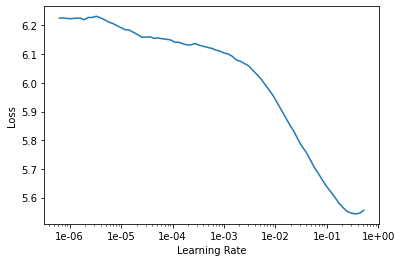

In [ ]:
# explore and plot the learning rates
learn.lr_find() 
learn.recorder.plot(skip_end=15)

In [ ]:
# train the language model
# we can see from the previous graph that 1e-1 is a good point,
# the loss is still decreasing, and before overfitting
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

# and save our good work
learn.save(base_dir + 'fit_head')
learn.save_encoder(base_dir + 'fit_head_enc')


epoch,train_loss,valid_loss,accuracy,time
0,4.496226,4.028318,0.329913,02:54


In [ ]:
# we have reached an accuracy of ~33%, but let's improve it:

# fine tune
learn.load(base_dir + 'fit_head');
learn.unfreeze()
learn.fit_one_cycle(8, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.289804,3.708222,0.361674,03:22
1,3.407731,3.722636,0.356064,03:22
2,3.243773,3.600091,0.375017,03:22
3,3.127868,3.524820,0.385568,03:22
4,2.918436,3.431346,0.395880,03:22
5,2.841487,3.377506,0.405866,03:22
6,2.587384,3.353596,0.412259,03:23
7,2.412118,3.372801,0.411203,03:22


In [ ]:
# we have reached 41%, and the loss just starts to raise, let's stop here
# save the model and the encoder
learn.save(base_dir + 'fine_tuned')
learn.save_encoder(base_dir + 'fine_tuned_enc')

In [ ]:
# let's check the language model - continue the sentence with 10 random words
learn.load(base_dir + 'fine_tuned');
learn.predict("This is a survey", n_words=10)

'This is a survey in the bibliography area indicated by the style file for'

## Classifier

As described in the introduction, with the learning model we can start build the classifier itself.


In [ ]:
path = Path(OUTPUT_BASE)

In [ ]:
# build a classifier with:
# - the .tex files
# - same vocabulary used in language model
# - 80% of the data used for learning, 20% of the data used for validation
# - use labels ["peer_reviewed", "not_peer_reviewed"] according to folder names
data_clas = TextList.from_folder(path, extensions={'.tex'}, vocab=data_lm.vocab).split_by_rand_pct(0.2).label_from_folder(classes=["peer_reviewed", "not_peer_reviewed"]).databunch(bs = batch_size)
 
data_clas.save(base_dir + 'data_clas.pkl')

In [12]:
data_clas = load_data(path, base_dir + 'data_clas.pkl', bs=batch_size)
 
# We can now create a model to classify those reviews and load the encoder we saved before.
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder(base_dir + 'fine_tuned_enc')
print()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


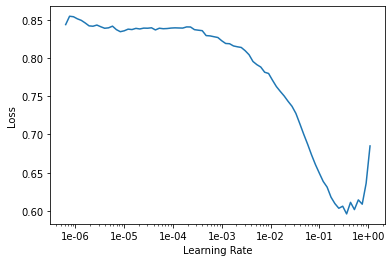

In [ ]:
# explore and plot the learning rates
learn.lr_find()
learn.recorder.plot()

In [ ]:
# according to the graph, it seems that 2e-2 is a good point -
# the loss is decreasing, before overfitting
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))
learn.save(base_dir + 'first')

epoch,train_loss,valid_loss,accuracy,time
0,0.866141,0.672836,0.645570,01:56


In [ ]:
# now we start 'peeling' layer after layer, and fine tune
learn.load(base_dir + 'first');
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn.save(base_dir + 'second')

epoch,train_loss,valid_loss,accuracy,time
0,0.605608,0.523277,0.924051,01:54


In [ ]:
learn.load(base_dir + 'second');
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.save(base_dir + 'third')

epoch,train_loss,valid_loss,accuracy,time
0,0.489047,0.441886,0.936709,01:54


In [ ]:
learn.load(base_dir + 'third');
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3) , moms=(0.8,0.7))
learn.save(base_dir + 'final')

epoch,train_loss,valid_loss,accuracy,time
0,0.454464,0.440046,0.936709,02:02
1,0.454871,0.432176,0.936709,01:58
